<a href="https://colab.research.google.com/github/Nataliahfk/TELECOM-X---PARTE-2/blob/main/TelecomX_SegundaParte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TELECOM X - PARTE 2: Previsión de cancelación en las suscripciones**

##**Descripción del proyecto:**

Desarrollo de modelos predictivos capaces de preveer que clientes tienen mayor probabilidad de cancelar sus suscripciones.

##**Objetivos:**

- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

#📊 **Preparar los datos para el modelado**

##Importando y conociendo los datos

In [950]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [951]:
#Importando datos
datos = pd.read_csv('/content/datos_tratados.csv')
datos.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,month to month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,month to month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,month to month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,month to month,1,mailed check,83.9,267.40,2.796667


In [952]:
datos.columns

Index(['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales', 'cuentas_diarias'],
      dtype='object')

# 🛠️ Tratamiento de los Datos

In [953]:
datos = datos.rename(columns={
    'es_ciudadano_senior': 'adulto_mayor',
    'meses_en_empresa': 'meses_empresa',
    'phone.PhoneService': 'servicio_telefonico',
    'lineas_multiples': 'multiples_lineas',
    'tipo_internet': 'servicio_internet',
    'tv_streaming': 'streaming_tv',
    'peliculas_streaming': 'streaming_peliculas',
    'cargos_mensuales': 'cargo_mensual',
    'cargos_totales': 'cargo_total'
})

print(datos.columns)


Index(['id_cliente', 'abandono', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'meses_empresa', 'servicio_telefonico',
       'multiples_lineas', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'tipo_contrato',
       'factura_electronica', 'metodo_pago', 'cargo_mensual', 'cargo_total',
       'cuentas_diarias'],
      dtype='object')


✔️ Remover columnas irrelevantes

***Nota**: inicialmente, se eliminarán las varialbes id_cliente ya que esta no aporta poder predictivo debido a que es un simple identificador de cliente, y cuentas_diarias ya que esta variable fue agregada simplemente al dividir cargos_mensuales en 30 días, lo cual resulta redundante y no aporta ningun valor agregado al análisis.*

In [954]:
# Eliminación de Columnas Irrelevantes
datos.drop('id_cliente', axis=1, inplace=True)
datos.drop('cuentas_diarias', axis=1, inplace=True)
datos

,abandono,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_empresa,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,one year,1,mailed check,65.60,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,month to month,0,mailed check,59.90,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,month to month,1,electronic check,73.90,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,month to month,1,electronic check,98.00,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,month to month,1,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,one year,0,mailed check,55.15,742.90
7252,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,month to month,1,electronic check,85.10,1873.70
7253,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,month to month,1,mailed check,50.30,92.75
7254,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,two year,0,mailed check,67.85,4627.65


In [955]:
datos.shape[0]

7256

In [956]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   adulto_mayor            7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_empresa           7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   multiples_lineas        7256 non-null   object 
 8   servicio_internet       7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  streaming_tv            7256 non-null   object 
 14  streaming_peliculas     7256 non-null   

In [957]:
print("\nEstadísticas Variables cualitativas:")
datos.describe(include='object')


Estadísticas Variables cualitativas:


,genero,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,metodo_pago
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,2,3,3,3,3,3,3,3,3,3,4
top,Male,No,Fiber optic,No,No,No,No,No,No,month to month,electronic check
freq,3669,3490,3198,3607,3181,3194,3581,2895,2866,4005,2445


In [958]:
columnas_categoricas = datos.select_dtypes(include='object').columns
print(columnas_categoricas)

Index(['genero', 'multiples_lineas', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'metodo_pago'],
      dtype='object')


#Distribución de la variable de respuesta (Abandono)

In [959]:
porcentaje_abandono = datos['abandono'].value_counts(normalize=True)*100
porcentaje_abandono.round(2)

,proportion
abandono,
0,74.24
1,25.76


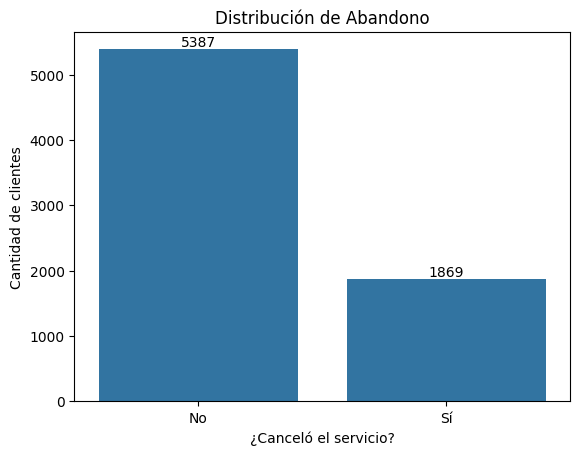

In [960]:
ax = sns.countplot(data=datos, x='abandono')

# Títulos y etiquetas
plt.title('Distribución de Abandono')
plt.xlabel('¿Canceló el servicio?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'])

# Agregar etiquetas de valores
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()

#Visualización de las variables categóricas sobre Cancelaciones de los usuarios.

In [961]:
px.histogram(datos,x='genero',text_auto=True,color='abandono',barmode='group')

In [962]:
px.histogram(datos,x='tiene_pareja',text_auto=True,color='abandono',barmode='group')

In [963]:
px.histogram(datos,x='tiene_dependientes',text_auto=True,color='abandono',barmode='group')

In [964]:
datos['adulto_mayor'].value_counts(normalize=True).round(2)*100

,proportion
adulto_mayor,
0,84.0
1,16.0


In [965]:
px.histogram(datos,x='adulto_mayor',text_auto=True,color='abandono',barmode='group')

In [966]:
px.histogram(datos,x='servicio_internet',text_auto=True,color='abandono',barmode='group')

In [967]:
px.histogram(datos,x='tipo_contrato',text_auto=True,color='abandono',barmode='group')

In [968]:
px.histogram(datos,x='metodo_pago',text_auto=True,color='abandono',barmode='group')

**OBSERVACIONES**



---



+ Variables altamente correlacionadas con abandono:

tipo_contrato:
Los clientes con contrato "month to month" tienen una tasa de abandono notablemente mayor.

metodo_pago:
"Electronic check" tiene mayor abandono que pagos automáticos.

---

+ Variables con poca influencia visual:

genero:
 No hay diferencia significativa entre hombres y mujeres.

adulto mayor:
 Ligera diferencia, pero no muy marcada.

tiene_dependientes y tiene_pareja:
Patrones no evidentes.


#Visualización de las variables cuantitativas sobre Abandono de los usuarios.

In [969]:
print("\nEstadísticas Variables cuantitativas:")
datos.describe()


Estadísticas Variables cuantitativas:


,abandono,adulto_mayor,tiene_pareja,tiene_dependientes,meses_empresa,servicio_telefonico,factura_electronica,cargo_mensual,cargo_total
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


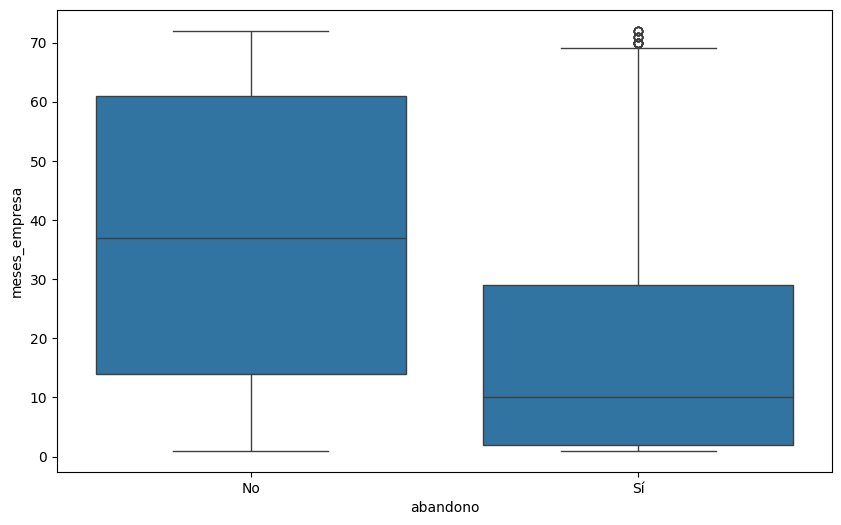

In [970]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='abandono', y='meses_empresa', data=datos)
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

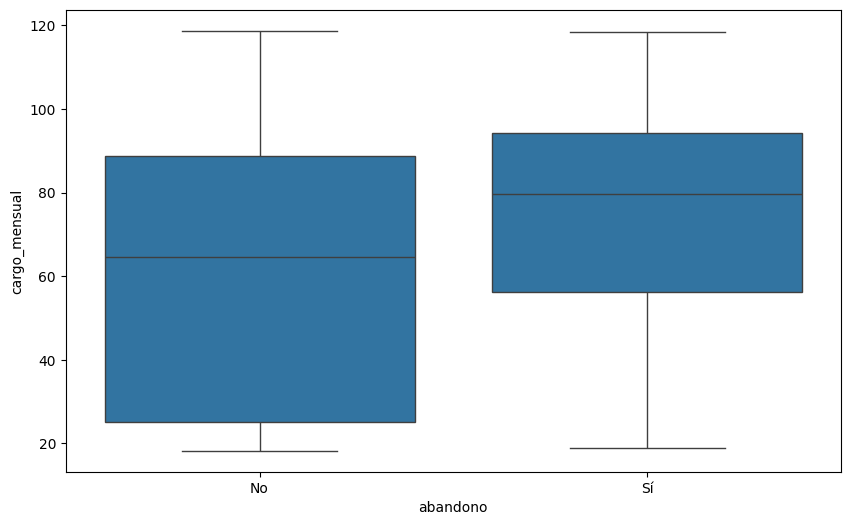

In [971]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='abandono', y='cargo_mensual', data=datos)
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

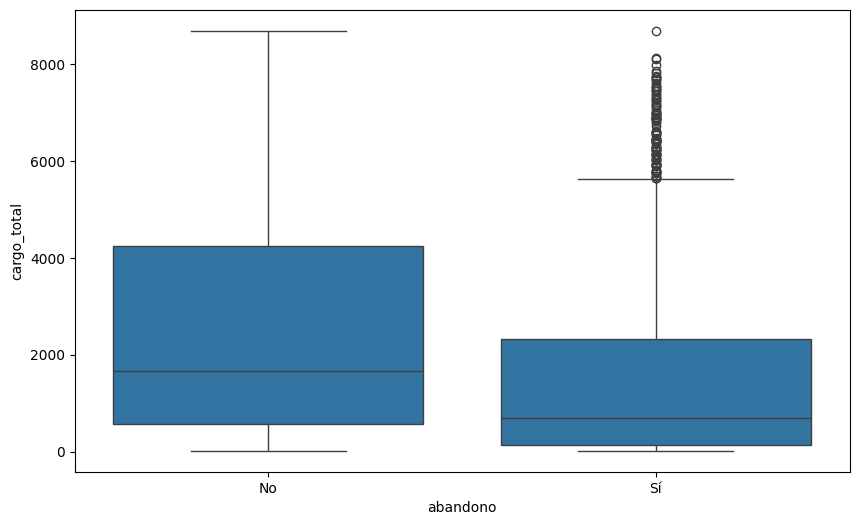

In [972]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='abandono', y='cargo_total', data=datos)
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

##Análisis de correlación:

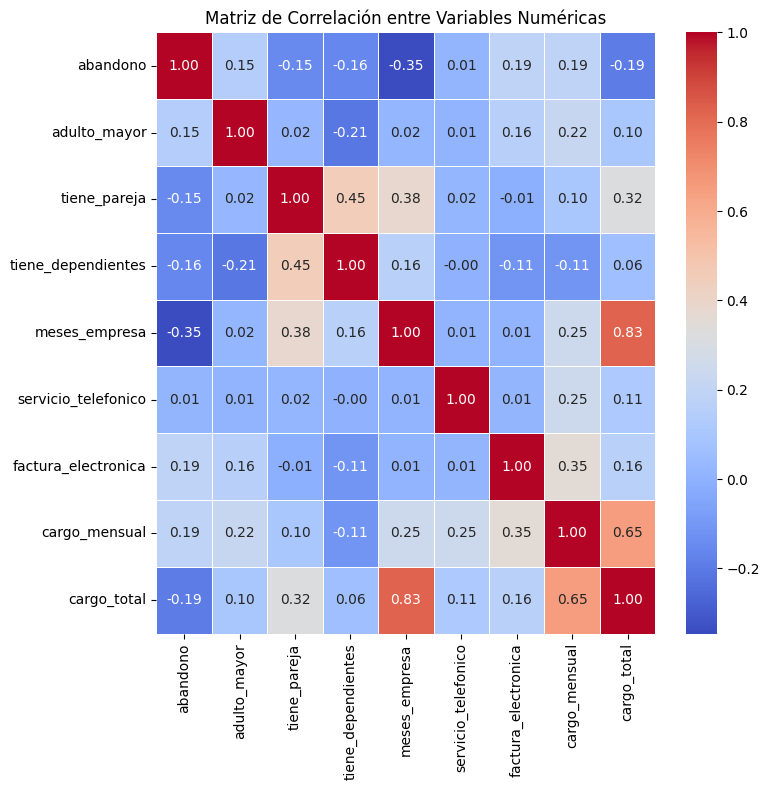

In [973]:
numericas = datos.select_dtypes(include=['int64', 'float64'])

# Calculamos la matriz de correlación
correlacion = numericas.corr()

# Graficamos el heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

#Tranformación de los datos

✔️ Agrupación de No y No service

✅ Resumen: Por qué agrupamos "No" y "No internet service"

🎯 Objetivo

Reducir multicolinealidad y simplificar los datos sin perder relevancia para el modelo predictivo.

---------------------------------------------------------------
⚠️ El problema original

   - Variables como OnlineSecurity, StreamingTV, etc., tenían tres categorías:

     - "Yes" → cliente usa el servicio
     - "No" → cliente tiene internet, pero no contrató el servicio
     - "No internet service" → cliente ni siquiera tiene internet, por lo tanto no puede usar el servicio

Esto generaba multicolinealidad perfecta al transformar estas categorías en dummies, lo que:
   - Creaba correlación 1.0 entre variables
   - Generaba VIF infinito
   - Comprometía la estabilidad y el rendimiento de los modelos

-----------------------------------------------------------------
✅ La solución: agrupar "No internet service" como "No"

  - Agrupamos "No internet service" como "No" para simplificar la variable:

   - "Yes" = significa que usa el servicio
   - "No" = significa que no usa el servicio
   
Esto reduce la dimensionalidad y evita multicolinealidad.

La información de que el cliente no tiene internet sigue estando en la variable InternetService.

In [974]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   adulto_mayor            7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_empresa           7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   multiples_lineas        7256 non-null   object 
 8   servicio_internet       7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  streaming_tv            7256 non-null   object 
 14  streaming_peliculas     7256 non-null   

In [975]:
# para crear uno nuevo
datos_clean = datos.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = ['seguridad_online','respaldo_online', 'proteccion_dispositivo',
               'soporte_tecnico','streaming_tv', 'streaming_peliculas']

for col in cols_to_fix:
    datos_clean[col] = datos_clean[col].replace('No internet service', 'No')

datos = datos_clean

In [976]:
# Separar variables explicativas y la variable de respuesta
x = datos.drop('abandono', axis=1)
y = datos['abandono']

In [977]:
x

,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_empresa,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,one year,1,mailed check,65.60,593.30
1,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,month to month,0,mailed check,59.90,542.40
2,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,month to month,1,electronic check,73.90,280.85
3,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,month to month,1,electronic check,98.00,1237.85
4,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,month to month,1,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,one year,0,mailed check,55.15,742.90
7252,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,month to month,1,electronic check,85.10,1873.70
7253,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,month to month,1,mailed check,50.30,92.75
7254,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,two year,0,mailed check,67.85,4627.65


In [978]:
y

,abandono
0,0
1,0
2,1
3,1
4,1
...,...
7251,0
7252,1
7253,0
7254,0


#2.2. Transformando variables explicativas

**OBSERVACIONES**

- Para este proceso se aplico codificación OneHotEncoding mediante el método pd.getdummies y especificaremos nuestro conjunto de datos, las columnas que queremos codificar (columns=categóricas) y el tipo de dato (dtype) que será entero.


In [979]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [980]:
columnas = x.columns

In [981]:
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), columnas_categoricas),
    remainder='passthrough',
    sparse_threshold=0
)

In [982]:
x = one_hot_encoder.fit_transform(x)

In [983]:
one_hot_encoder.get_feature_names_out(columnas)

array(['onehotencoder__genero_Male', 'onehotencoder__multiples_lineas_No',
       'onehotencoder__multiples_lineas_No phone service',
       'onehotencoder__multiples_lineas_Yes',
       'onehotencoder__servicio_internet_DSL',
       'onehotencoder__servicio_internet_Fiber optic',
       'onehotencoder__servicio_internet_No',
       'onehotencoder__seguridad_online_Yes',
       'onehotencoder__respaldo_online_Yes',
       'onehotencoder__proteccion_dispositivo_Yes',
       'onehotencoder__soporte_tecnico_Yes',
       'onehotencoder__streaming_tv_Yes',
       'onehotencoder__streaming_peliculas_Yes',
       'onehotencoder__tipo_contrato_month to month',
       'onehotencoder__tipo_contrato_one year',
       'onehotencoder__tipo_contrato_two year',
       'onehotencoder__metodo_pago_bank transfer automatic',
       'onehotencoder__metodo_pago_credit card automatic',
       'onehotencoder__metodo_pago_electronic check',
       'onehotencoder__metodo_pago_mailed check',
       'remainder__

In [984]:
pd.DataFrame(x, columns=one_hot_encoder.get_feature_names_out(columnas))

,onehotencoder__genero_Male,onehotencoder__multiples_lineas_No,onehotencoder__multiples_lineas_No phone service,onehotencoder__multiples_lineas_Yes,onehotencoder__servicio_internet_DSL,onehotencoder__servicio_internet_Fiber optic,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_Yes,onehotencoder__proteccion_dispositivo_Yes,...,onehotencoder__metodo_pago_electronic check,onehotencoder__metodo_pago_mailed check,remainder__adulto_mayor,remainder__tiene_pareja,remainder__tiene_dependientes,remainder__meses_empresa,remainder__servicio_telefonico,remainder__factura_electronica,remainder__cargo_mensual,remainder__cargo_total
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90
7252,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70
7253,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75
7254,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65


##Transformando variable respuesta

In [985]:
from sklearn.preprocessing import LabelEncoder

In [986]:
label_encoder = LabelEncoder()

In [987]:
y = label_encoder.fit_transform(y)

In [988]:
y

array([0, 0, 1, ..., 0, 0, 0])

**Observacion:**
------------
X: contiene solo las features explicativas (sin la variable objetivo).

y: contiene la variable objetivo (abandono), que se estará usando para el entrenamiento y evaluación.

##🤖 Modelos Predictivos

**↔️ Separando los datos Train y Test**

In [989]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y, random_state=42)

- BALANCEO DE CLASES CON SMOTE

In [1037]:
# Aplicar SMOTE para balancear la clase minoritaria en el set de entrenamiento
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

##Modelo de referencia - Baseline

In [991]:
from sklearn.dummy import DummyClassifier

In [992]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.7424242424242424

##Modelo de árbol de decisión

In [993]:
from sklearn.tree import DecisionTreeClassifier

In [994]:
modelo_arbol = DecisionTreeClassifier(random_state=5, max_depth=3)
modelo_arbol.fit(x_train, y_train)

modelo_arbol.score(x_test, y_test)

0.7913223140495868

- Normalizar

Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.

In [995]:
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
x_train_normalizado = normalizacion.fit_transform(x_train_smote)
x_test_normalizado = normalizacion.transform(x_test)

In [996]:
pd.DataFrame(x_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.859155,0.0,1.0,0.252239,0.315013
1,0.000000,0.000000,0.0,1.000000,0.0,1.0,0.0,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.225352,1.0,0.0,0.696517,0.166380
2,0.000000,1.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0,0.016418,0.000127
3,1.000000,0.000000,0.0,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.126761,1.0,1.0,0.536318,0.089482
4,0.000000,1.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.774648,1.0,0.0,0.702985,0.571105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.554687,0.445313,0.0,0.554687,0.0,1.0,0.0,0.000000,1.000000,0.000000,...,0.554687,0.445313,0.000000,0.000000,0.000000,0.311400,1.0,1.0,0.634861,0.212335
8614,0.000000,0.000000,0.0,1.000000,0.0,1.0,0.0,0.174068,0.825932,0.825932,...,1.000000,0.000000,0.000000,0.825932,0.825932,0.154930,1.0,1.0,0.649591,0.103845
8615,0.631459,0.368541,0.0,0.631459,0.0,1.0,0.0,0.000000,1.000000,0.368541,...,0.631459,0.000000,0.631459,0.368541,0.000000,0.323944,1.0,1.0,0.818720,0.279034
8616,0.784405,0.215595,0.0,0.784405,0.0,1.0,0.0,0.000000,0.215595,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0,0.560131,0.006432


##Modelo KNN

In [997]:
from sklearn.neighbors import KNeighborsClassifier

In [998]:
knn = KNeighborsClassifier()
knn.fit(x_train_normalizado, y_train_smote)

knn.score(x_test_normalizado, y_test)

0.6914600550964187

In [999]:
lista = [('dummy', dummy, x_test), ('arbol',modelo_arbol,x_test), ('knn',knn,x_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo {i[0]} es: {i[1].score(i[2], y_test)}')

La exactitud del modelo dummy es: 0.7424242424242424
La exactitud del modelo arbol es: 0.7913223140495868
La exactitud del modelo knn es: 0.6914600550964187


In [1000]:
from sklearn.model_selection import train_test_split

In [1001]:
x,x_test,y,y_test = train_test_split(x,y,test_size=0.2,stratify = y, random_state=42)
x_train,x_val,y_train, y_val = train_test_split(x,y,stratify = y, random_state=42)

In [1002]:
modelo_arbol = DecisionTreeClassifier(max_depth=4)
modelo_arbol.fit(x_train, y_train)

print(f'La exactitud con el conjunto de entrenamiento es de: {modelo_arbol.score(x_train,y_train)}')
print(f'La exactitud con el conjunto de validación es de:  {modelo_arbol.score(x_val,y_val)}')

La exactitud con el conjunto de entrenamiento es de: 0.80289455547898
La exactitud con el conjunto de validación es de:  0.7705031013094418


##Modelo RamdomForetClassifier

In [1003]:
from sklearn.ensemble import RandomForestClassifier

In [1004]:
modelo_rf = RandomForestClassifier(max_depth = 10)
modelo_rf.fit(x_train, y_train)
print(f'Precisión de entrenamiento: {modelo_rf.score(x_train, y_train)}')
print(f'Precisión de validación: {modelo_rf.score(x_val, y_val)}')

Precisión de entrenamiento: 0.8853664139673788
Precisión de validación: 0.7891109579600276


##Matriz de Confusión

In [1005]:
from sklearn.metrics import confusion_matrix

In [1006]:
y_previsto_arbol = modelo_arbol.predict(x_val)
matriz_confusion_arbol = confusion_matrix(y_val, y_previsto_arbol)
print(matriz_confusion_arbol)

[[965 112]
 [221 153]]


In [1007]:
y_previsto_rf = modelo_rf.predict(x_val)
matriz_confusion_rf = confusion_matrix(y_val, y_previsto_rf)
print(matriz_confusion_rf)

[[979  98]
 [208 166]]


In [1008]:
from sklearn.metrics import ConfusionMatrixDisplay

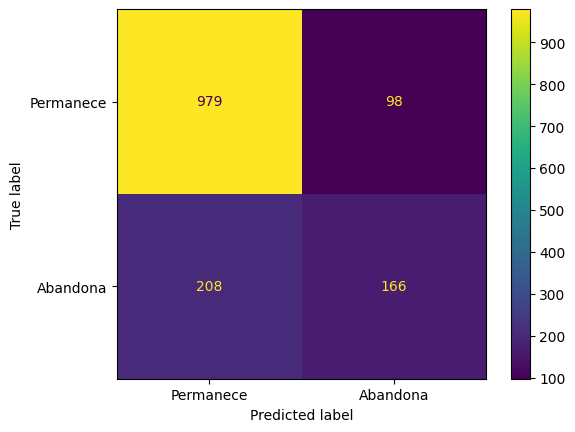

In [1009]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_rf, display_labels=['Permanece','Abandona'])
visualizacion.plot();

- El modelo predice 981 clientes que permanecen en la compañia.
- Como Falsos Negativos nos muestra 211 clientes.
- Como Falsos Positivos nos muestra 96 clientes.
- Y los que realmente Permaneces son 163 clientes.

#Evaluación de los Modelos

In [1010]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [1011]:
print(f'La Exactitud (Accuracy) del modelo de arbol es: {accuracy_score(y_val, y_previsto_arbol):.4f}')
print(f'La Precisión (Precision) del modelo de arbol es: {precision_score(y_val, y_previsto_arbol):.4f}')
print(f'La Sensibilidad (Recall) del modelo de arbol es: {recall_score(y_val, y_previsto_arbol):.4f}')
print(f'El F1-Score del modelo de arbol es: {f1_score(y_val, y_previsto_arbol):.4f}')

La Exactitud (Accuracy) del modelo de arbol es: 0.7705
La Precisión (Precision) del modelo de arbol es: 0.5774
La Sensibilidad (Recall) del modelo de arbol es: 0.4091
El F1-Score del modelo de arbol es: 0.4789


In [1012]:
print(f'La Exactitud (Accuracy) del modelo RamdomForet es: {accuracy_score(y_val, y_previsto_rf):.4f}')
print(f'La Precisión (Precision) del modelo RamdomForet es: {precision_score(y_val, y_previsto_rf):.4f}')
print(f'La Sensibilidad (Recall) del modelo RamdomForet es: {recall_score(y_val, y_previsto_rf):.4f}')
print(f'El F1-Score del modelo RamdomForet es: {f1_score(y_val, y_previsto_rf):.4f}')

La Exactitud (Accuracy) del modelo RamdomForet es: 0.7891
La Precisión (Precision) del modelo RamdomForet es: 0.6288
La Sensibilidad (Recall) del modelo RamdomForet es: 0.4439
El F1-Score del modelo RamdomForet es: 0.5204


CURVA ROC

In [1013]:
from sklearn.metrics import RocCurveDisplay

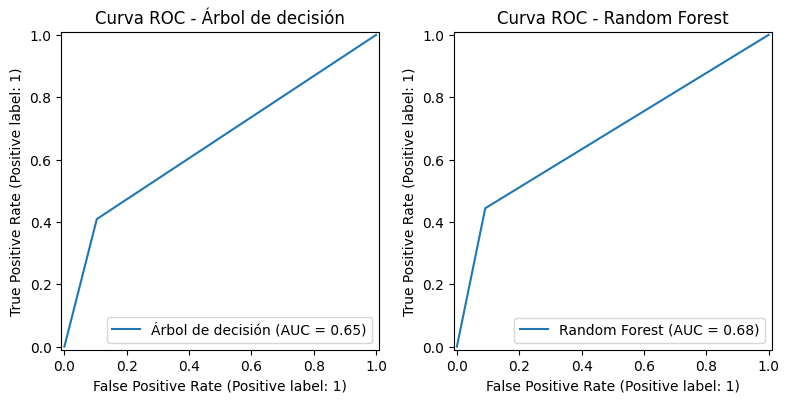

In [1014]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 8))

# Árbol de decisión
RocCurveDisplay.from_predictions(
    y_val, y_previsto_arbol,
    name='Árbol de decisión',
    ax=axes[0]
)
axes[0].set_title("Curva ROC - Árbol de decisión")

# Random Forest
RocCurveDisplay.from_predictions(
    y_val, y_previsto_rf,
    name='Random Forest',
    ax=axes[1]
)
axes[1].set_title("Curva ROC - Random Forest")

plt.tight_layout()
plt.show()

In [1015]:
from sklearn.metrics import roc_auc_score

In [1016]:
print(f'El AUC del modelo de árbol es: {roc_auc_score(y_val, y_previsto_arbol):.2f}')
print(f'El AUC del modelo de RamdomForet es: {roc_auc_score(y_val, y_previsto_rf):.2f}')

El AUC del modelo de árbol es: 0.65
El AUC del modelo de RamdomForet es: 0.68


In [1017]:
from sklearn.metrics import PrecisionRecallDisplay

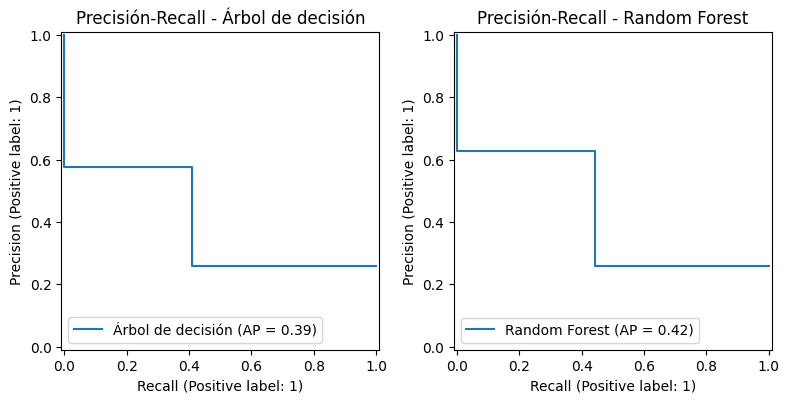

In [1018]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 8))

# Árbol de decisión
PrecisionRecallDisplay.from_predictions(
    y_val, y_previsto_arbol,
    name='Árbol de decisión',
    ax=axes[0]
)
axes[0].set_title("Precisión-Recall - Árbol de decisión")

# Random Forest
PrecisionRecallDisplay.from_predictions(
    y_val, y_previsto_rf,
    name='Random Forest',
    ax=axes[1]
)
axes[1].set_title("Precisión-Recall - Random Forest")

plt.tight_layout()
plt.show()


In [1019]:
from sklearn.metrics import average_precision_score

In [1020]:
print (f'El Score promedio de precisión del modelo de árbol es: {average_precision_score(y_val, y_previsto_arbol):.2f}')
print (f'El Score promedio de precisión del modelo de RamdomForet es: {average_precision_score(y_val, y_previsto_rf):.2f}')

El Score promedio de precisión del modelo de árbol es: 0.39
El Score promedio de precisión del modelo de RamdomForet es: 0.42


#Validación cruzada

#Usando KFold



In [1021]:
from sklearn.model_selection import KFold, cross_validate

In [1022]:
modelo_arbol = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados_arbol = cross_validate(modelo_arbol, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_arbol

{'fit_time': array([0.02858758, 0.02538109, 0.02437186, 0.0253067 , 0.0251224 ]),
 'score_time': array([0.00746512, 0.00740433, 0.00751781, 0.00767541, 0.01039982]),
 'test_accuracy': array([0.75193798, 0.77174849, 0.75193798, 0.75107666, 0.76206897]),
 'test_recall': array([0.49675325, 0.4874552 , 0.4548495 , 0.48504983, 0.4512987 ]),
 'test_precision': array([0.53496503, 0.52713178, 0.5210728 , 0.52142857, 0.56504065]),
 'test_f1': array([0.51515152, 0.50651769, 0.48571429, 0.50258176, 0.50180505])}

In [1023]:
modelo_rf = RandomForestClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados_rf = cross_validate(modelo_rf, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_rf

{'fit_time': array([0.55613494, 0.53183937, 0.52853251, 0.51679158, 0.54209638]),
 'score_time': array([0.02797985, 0.03405905, 0.02818942, 0.02957892, 0.02735591]),
 'test_accuracy': array([0.80103359, 0.80620155, 0.79672696, 0.79414298, 0.8137931 ]),
 'test_recall': array([0.51298701, 0.44444444, 0.48160535, 0.46843854, 0.52922078]),
 'test_precision': array([0.66108787, 0.63917526, 0.64      , 0.64090909, 0.6965812 ]),
 'test_f1': array([0.57769653, 0.5243129 , 0.54961832, 0.54126679, 0.60147601])}

In [1024]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1)}]')

In [1025]:
informe_metricas(cv_resultados_arbol)

Intervalo de confianza(test_accuracy): [0.7415872926824447, 0.773920741414202]
Intervalo de confianza(test_recall): [0.43823462861218443, 0.5119279623475624]
Intervalo de confianza(test_precision): [0.5012260489314823, 0.5666294857408029]
Intervalo de confianza(test_f1): [0.4832052530988324, 0.5215028674957523]


In [1026]:
informe_metricas(cv_resultados_rf)

Intervalo de confianza(test_accuracy): [0.7883373764303807, 0.8164218976793345]
Intervalo de confianza(test_recall): [0.42640024535304477, 0.5482782050584692]
Intervalo de confianza(test_precision): [0.6113826580409891, 0.6997187064914241]
Intervalo de confianza(test_f1): [0.5040334663160037, 0.6137147548482768]


In [1027]:
datos.abandono.value_counts()

,count
abandono,
0,5387
1,1869


In [1028]:
from sklearn.model_selection import StratifiedKFold

In [1029]:
modelo_arbol = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados_arbol = cross_validate(modelo_arbol, x, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_arbol

{'fit_time': array([0.02617788, 0.02482629, 0.02478456, 0.02445626, 0.02446008]),
 'score_time': array([0.00738716, 0.00726795, 0.00755954, 0.00794077, 0.0072639 ]),
 'test_accuracy': array([0.78294574, 0.78036176, 0.75021533, 0.75452196, 0.75948276]),
 'test_recall': array([0.53846154, 0.50501672, 0.4916388 , 0.47826087, 0.51170569]),
 'test_precision': array([0.58545455, 0.58527132, 0.51578947, 0.52573529, 0.53496503]),
 'test_f1': array([0.56097561, 0.54219031, 0.50342466, 0.50087566, 0.52307692])}

In [1030]:
modelo_rf = RandomForestClassifier(max_depth = 10)
skf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados_rf = cross_validate(modelo_rf, x, y, cv=skf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados_rf

{'fit_time': array([0.55156159, 0.53699946, 0.5337708 , 0.52662587, 0.56261063]),
 'score_time': array([0.03231835, 0.02809262, 0.03071833, 0.02759695, 0.02722502]),
 'test_accuracy': array([0.80103359, 0.80534022, 0.791559  , 0.79586563, 0.80948276]),
 'test_recall': array([0.50974026, 0.46236559, 0.47826087, 0.46843854, 0.52272727]),
 'test_precision': array([0.66244726, 0.62926829, 0.62445415, 0.64678899, 0.68510638]),
 'test_f1': array([0.57614679, 0.53305785, 0.54166667, 0.5433526 , 0.59300184])}

In [1031]:
informe_metricas(cv_resultados_arbol)

Intervalo de confianza(test_accuracy): [0.7384415711199516, 0.7925694479183328]
Intervalo de confianza(test_recall): [0.46443946250674756, 0.5455939823093059]
Intervalo de confianza(test_precision): [0.489545043840517, 0.6093412225798412]
Intervalo de confianza(test_f1): [0.48019755687211946, 0.5720197040543956]


In [1032]:
informe_metricas(cv_resultados_rf)

Intervalo de confianza(test_accuracy): [0.7878281722503924, 0.8134843110428449]
Intervalo de confianza(test_recall): [0.44087000571834156, 0.5357430069362903]
Intervalo de confianza(test_precision): [0.6050767519246083, 0.6941492770125599]
Intervalo de confianza(test_f1): [0.511346729744991, 0.603543570124552]


Probando el modelo Random Forest

In [1047]:
y_previsto_rf_test = modelo_rf.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1078
           1       0.26      1.00      0.41       374

    accuracy                           0.26      1452
   macro avg       0.13      0.50      0.20      1452
weighted avg       0.07      0.26      0.11      1452



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



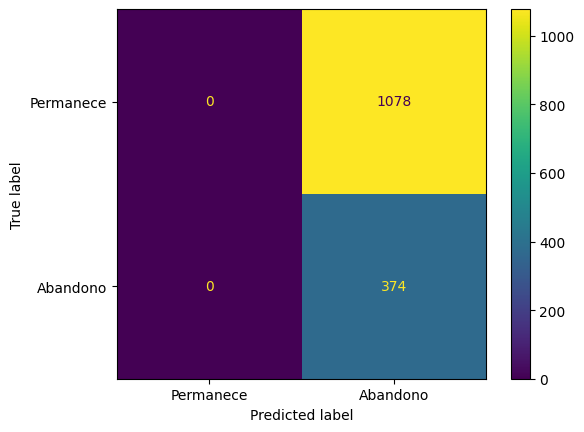

In [1048]:
print(classification_report(y_test,y_previsto_rf_test))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_rf_test,display_labels=['Permanece','Abandono']);

                              feature  importance
3                       meses_empresa   14.834670
7                         cargo_total   14.482430
6                       cargo_mensual   13.808512
11      servicio_internet_Fiber optic    6.311271
20             tipo_contrato_two year    5.544195
22       metodo_pago_electronic check    4.105073
5                 factura_electronica    4.089363
16                soporte_tecnico_Yes    3.525337
13               seguridad_online_Yes    3.459355
19             tipo_contrato_one year    3.359946
8                         genero_Male    3.097148
1                        tiene_pareja    2.993437
14                respaldo_online_Yes    2.572220
2                  tiene_dependientes    2.533803
12               servicio_internet_No    2.405933
10               multiples_lineas_Yes    2.138097
15         proteccion_dispositivo_Yes    2.006677
17                   streaming_tv_Yes    1.821229
18            streaming_peliculas_Yes    1.735208


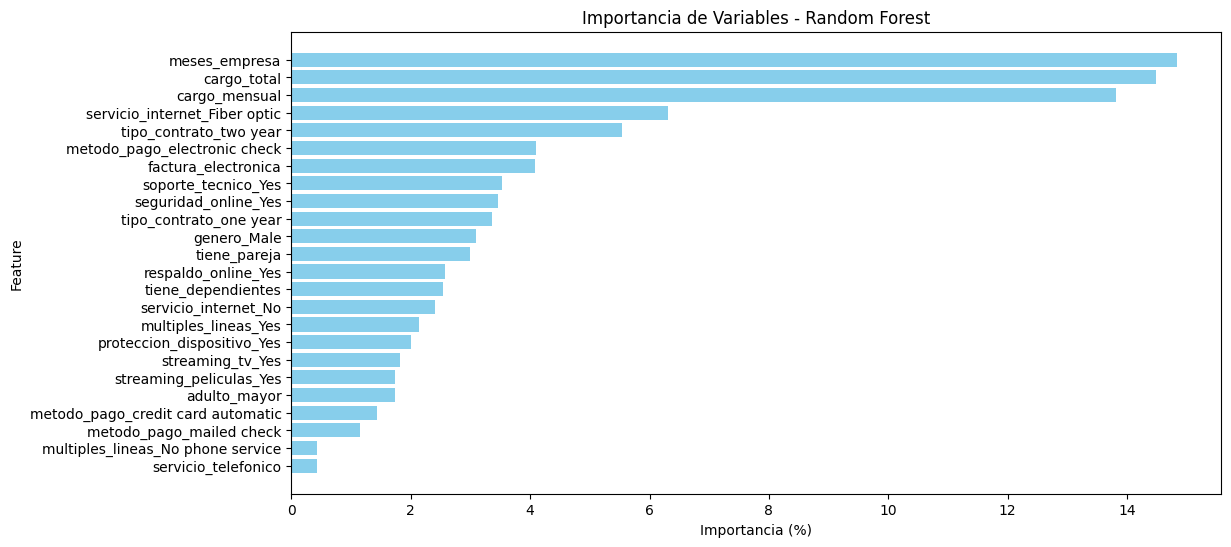

In [1049]:
# ---------------------------
# Librerías
# ---------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# ---------------------------
# Separar features y target
# ---------------------------
x = datos.drop('abandono', axis=1)
y = datos['abandono']

# ---------------------------
# Identificar columnas categóricas
# ---------------------------
columnas_categoricas = x.select_dtypes(include='object').columns

# ---------------------------
# One-Hot Encoding para variables categóricas
# ---------------------------
encoder = OneHotEncoder(drop='first', sparse_output=False)
x_encoded = pd.DataFrame(
    encoder.fit_transform(x[columnas_categoricas]),
    columns=encoder.get_feature_names_out(columnas_categoricas)
)

# Combinar columnas numéricas y codificadas
x_numerico = x.drop(columnas_categoricas, axis=1).reset_index(drop=True)
x_final = pd.concat([x_numerico, x_encoded], axis=1)

# ---------------------------
# Train/Test split
# ---------------------------
x_train, x_test, y_train, y_test = train_test_split(
    x_final, y, test_size=0.2, stratify=y, random_state=42
)

# ---------------------------
# Escalado
# ---------------------------
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# ---------------------------
# SMOTE solo en entrenamiento
# ---------------------------
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

# Convertir a DataFrame para mantener columnas
x_train_smote_df = pd.DataFrame(x_train_smote, columns=x_final.columns)

# ---------------------------
# Entrenar Random Forest
# ---------------------------
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(x_train_smote, y_train_smote)

# ---------------------------
# Importancias de variables
# ---------------------------
feature_importances = pd.DataFrame({
    'feature': x_train_smote_df.columns,
    'importance': modelo_rf.feature_importances_ * 100
}).sort_values('importance', ascending=False)

print(feature_importances)

# ---------------------------
# Gráfico de barras
# ---------------------------
plt.figure(figsize=(12,6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel("Importancia (%)")
plt.ylabel("Feature")
plt.title("Importancia de Variables - Random Forest")
plt.gca().invert_yaxis()  # Mostrar la más importante arriba
plt.show()


#**CONCLUSIONES:**

###Informe Final – Análisis de Abandono de Clientes y Recomendaciones Estratégicas.

###1. Conclusiones del Análisis

Tras analizar la distribución de las variables y la correlación de los datos, se identificaron los principales factores que explican el abandono de clientes y aquellos que contribuyen a su retención:

###**Factores que aumentan la probabilidad de abandono**

- Contrato mes a mes: Los clientes sin compromiso a largo plazo presentan mayor riesgo de cancelación.

- Método de pago Electronic Check: Asociado con un mayor abandono por posibles inconvenientes en la experiencia de pago.

- Servicio de Internet por fibra óptica: Alta tasa de cancelación posiblemente debido a problemas técnicos.

- Cargos mensuales altos: Los clientes con pagos elevados tienden a abandonar más frecuentemente.

##**Factores que favorecen la retención**

- Mayor tiempo de contrato: Los contratos a largo plazo aumentan la fidelidad del cliente.

- Contratos con soporte técnico: Mejoran la experiencia del cliente y mantienen su compromiso.

- Seguridad online: Protege los datos del cliente, incrementando la confianza y lealtad.

- Pago automático mediante tarjeta de crédito o transferencia: Simplifica el proceso de pago y reduce la probabilidad de cancelación.

<br>

##**2. Recomendaciones Estratégicas**

2.1 Fidelización temprana

- Implementar campañas de retención durante los primeros 3 meses del servicio.

- Ofrecer incentivos como descuentos por permanencia o paquetes personalizados.

2.2 Mejora en soporte al cliente

- Entrenamiento del personal y seguimiento efectivo de problemas técnicos.

- Combinar chatbots con atención personalizada para mayor cobertura y rapidez.

2.3 Transparencia en la facturación

- Informar de manera clara sobre tarifas, cargos adicionales y beneficios.

- Ofrecer comparadores de planes para aumentar la percepción de valor.

2.4 Promoción de servicios adicionales

- Detectar clientes con bajo uso y ofrecer beneficios para fomentar la adopción.

- Crear paquetes atractivos y personalizados que integren múltiples servicios.

2.5 Incentivar contratos a largo plazo

- Diseñar ofertas y descuentos especiales para clientes con contratos mes a mes, promoviendo el cambio a planes de 1 o 2 años.

- Esto aumenta la lealtad y reduce la tasa de abandono a largo plazo.

2.6 Segmentación y ofertas personalizadas

- Utilizar modelos predictivos para identificar clientes de alto riesgo (por ejemplo, contrato mensual con altos gastos).

- Ofrecer promociones proactivas y personalizadas antes de que consideren cancelar el servicio.

##3. Resumen Ejecutivo

La combinación de fidelización temprana, contratos a largo plazo, soporte de calidad, transparencia en la facturación y ofertas personalizadas permitirá a Telecom X:

- Reducir significativamente la tasa de cancelación.
- Mejorar la satisfacción y experiencia de los clientes.
-Aumentar la rentabilidad y lealtad a largo plazo.
--------------------------------------------------------------------
<br>
“Al aplicar estrategias fundamentadas en análisis de datos, Telecom X logrará disminuir de manera significativa la tasa de cancelación, potenciar la satisfacción de sus clientes y aumentar la rentabilidad a largo plazo.”